<a id="section_CART"></a> 
## Workshop Final DS Digital House

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
# importando bases de treino e teste
df_test = pd.read_csv(r'https://raw.githubusercontent.com/faustinothiagos/Workshop_Final_DS_Digital_House_2022/main/DataSet/test.csv')
df_train = pd.read_csv(r'https://raw.githubusercontent.com/faustinothiagos/Workshop_Final_DS_Digital_House_2022/main/DataSet/train.csv')

c:\Users\Luquinhas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# incluindo colunas para sperar os dados da mesma maneira que estavam originalmente
df_train['test'] = 0
df_test['test'] = 1

# incluindo coluna de score com nan nos dados de teste
df_test['Credit_Score'] = np.nan

In [4]:
# concatenando os datasets ja que eles tem as mesmas colunas

df_total = pd.concat([df_train, df_test], ignore_index = True)

In [5]:
df_total.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  test  
0  312.49408867943663         Good     0  
1  284.62916249607184         Good     0  
2   331.2098628537912         Good     0  
3  223.45130972736786         Good     0  
4  341.48923103222177         Good     0

In [6]:
print('dados de treino: ', df_train.shape)
print('dados de teste: ', df_test.shape)
print('todos os dados agrupados: ', df_total.shape)

dados de treino:  (100000, 29)
dados de teste:  (50000, 29)
todos os dados agrupados:  (150000, 29)


## Colunas dataset:

* ID - Identificador de entrada
* Customer_ID - ID cliente
* Month - Mês do ano
* Name - nome do cliente
* Age - Idade Cliente
* SSN - Social Security Number (CPF no Brasil)
* Occupation - Ocupação do cliente
* Annual_Income - renda anual
* Monthly_Inhand_Salary - Salario mensal do cliente
* Num_Bank_Accounts - quantidade de contas em bancos
* Num_Credit_Card - quantidade de cartões de crédito
* Interest_Rate - taxa de juros cartão de crédito
* Num_of_Loan - Quantidade de empréstimos feitos no banco
* Type_of_Loan - tipo de empréstimo feito pelo cliente
* Delay_from_due_date - qtd. de dias de atraso pagamento cartão
* Num_of_Delayed_Payment - Média de pagamentos atrasado pelo cliente
* Changed_Credit_Limit - Variação percentual de limite do cartão de crédito
* Num_Credit_Inquiries - Quantidade de "cobranças" no cartão
* Credit_Mix - mix de crédito do cliente
* Outstanding_Debt - restante à ser pago da dívida
* Credit_Utilization_Ratio - Taxa de utlização do cartão de crédito
* Credit_History_Age - Tempo de histórico de crédito do cliente
* Payment_of_Min_Amount - Pagamento minimo
* Total_EMI_per_month - Pagamento fixo em dolares por mes
* Amount_invested_monthly - Quantidade de dinheiro investido pelo cliente mensalmente
* Payment_Behaviour - Comportamento de pagamento cliente
* Monthly_Balance - Saldo Mensal Cliente
* Credit_Score - Target
* test - coluna utilizada para separar o dataset nos dados de treino e teste

In [7]:
# quantidade % de dados faltantes
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title("% de dados faltantes")
        plt.show()
    else:
        print('No NAs found')

In [9]:
colunas = df_total.columns

for coluna in colunas:
    print('Variavel: ', coluna)
    print(20*'-')
    print(df_total[coluna].value_counts(dropna=False))

Variavel:  ID
--------------------
0x18a64    1
0x1e231    1
0x25ef7    1
0xf0ee     1
0xcf02     1
          ..
0x1c30b    1
0x1570a    1
0x1469e    1
0xde1f     1
0x5a30     1
Name: ID, Length: 150000, dtype: int64
Variavel:  Customer_ID
--------------------
CUS_0x9a95    12
CUS_0x98c2    12
CUS_0x2e9e    12
CUS_0x2b8e    12
CUS_0x90f0    12
              ..
CUS_0x6187    12
CUS_0x5bb8    12
CUS_0x339e    12
CUS_0x652c    12
CUS_0x4af4    12
Name: Customer_ID, Length: 12500, dtype: int64
Variavel:  Month
--------------------
August       12500
December     12500
May          12500
January      12500
June         12500
November     12500
July         12500
March        12500
September    12500
October      12500
April        12500
February     12500
Name: Month, dtype: int64
Variavel:  Name
--------------------
NaN                  15000
Stevex                  66
Langep                  65
Jessicad                59
Vaughanl                58
                     ...  
Fabir         

### Observações

1. Colunas numéricas com "_" ok
    * Age,
    * Annual_Income,
    * Monthly_Inhand_Salary,
    * Num_Bank_Accounts,
    * Num_Credit_Card,
    * Interest_Rate
    * Num_of_Loan
    * Delay_from_due_date
    * Num_of_Delayed_Payment
    * Changed_Credit_Limit
    * Num_Credit_Inquiries
    * Outstanding_Debt
    * Credit_Utilization_Ratio
    * Total_EMI_per_month
    * Amount_invested_monthly
    * Monthly_Balance
2. SSN #F%$D@*&8 ok
3. Occupation _______ ok
4. Type_of_Loan - transformar em lista e indexar
5. Changed_Credit_Limit "_" -> NaN ok
6. Credit_Mix "_" -> NaN ok
7. Credit_History_Age Transformar em qtd. Meses
8. Payment_of_Min_Amount "NM" -> NaN ok
9. Payment_Behaviour "!@9#%8" -> NaN e transformar dado ok

In [14]:
# Campos númericos que estão como string - retirar underline dos numeros

colunas_ul = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for row in colunas_ul:
    df_total[row] = df_total[row].str.replace(r'_+', '')

<ipython-input-14-307ac66e0f28>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_total[row] = df_total[row].str.replace(r'_+', '')


In [16]:
# removendo caracter estranho do SSN
df_total['SSN'].replace('#F%$D@*&8', np.NaN, inplace=True)

In [17]:
# removendo os underlines e colocando NaN na coluna Occupation
df_total['Occupation'].replace('_______', np.NaN, inplace=True)

In [18]:
df_total['Changed_Credit_Limit'].replace(['_', ''], np.NaN, inplace=True)

In [19]:
df_total['Credit_Mix'].replace('_', np.NaN, inplace=True)

In [20]:
df_total['Payment_of_Min_Amount'].replace('NM', np.NaN, inplace=True)

In [21]:
df_total['Payment_Behaviour'].replace('!@9#%8', np.NaN, inplace=True)

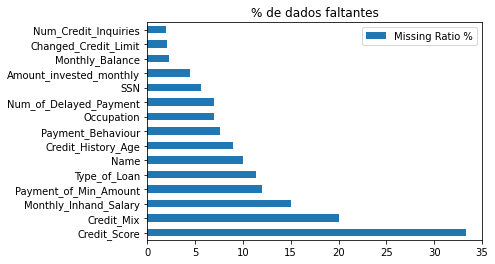

In [24]:
plot_nas(df_total)

In [30]:
# convertendo Credit_History_Age em quantidade de meses
def converter_mes(x):
    if pd.notnull(x):
        ano = int(x.split(' ')[0])
        mes = int(x.split(' ')[3])
        return (ano*12)+mes
    else:
        return x

df_total['Credit_History_age'] = df_total['Credit_History_Age'].apply(lambda x: converter_mes(x)).astype(float)

In [29]:
# ideia - transformar em dummy
df_total['Type_of_Loan'].sample(10)

112581                                                  NaN
122445           Mortgage Loan, Student Loan, and Auto Loan
15865     Credit-Builder Loan, Credit-Builder Loan, and ...
138300                                        Mortgage Loan
68205     Personal Loan, Home Equity Loan, Auto Loan, Mo...
22656     Home Equity Loan, Debt Consolidation Loan, and...
130549    Auto Loan, Mortgage Loan, Personal Loan, Credi...
109141           Personal Loan, and Debt Consolidation Loan
36470     Personal Loan, Student Loan, Mortgage Loan, Cr...
40965     Student Loan, Auto Loan, Not Specified, Debt C...
Name: Type_of_Loan, dtype: object

In [43]:
# transformando as variaveis para o tipo que faz sentido

col_int = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment']
col_float = ['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Delay_from_due_date', 
             'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
             'Amount_invested_monthly', 'Total_EMI_per_month']
col_cat = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# aplicando as type para variaveis int

df_total['Age'] = df_total['Age'].astype('int')
df_total['Num_Bank_Accounts'] = df_total['Num_Bank_Accounts'].astype('int')
df_total['Num_Credit_Card'] = df_total['Num_Credit_Card'].astype('int')
df_total['Num_of_Loan'] = df_total['Num_of_Loan'].astype('int')
df_total['Num_of_Delayed_Payment'] = df_total['Num_of_Delayed_Payment'].astype('int', errors='ignore')

# float

df_total['Annual_Income'] = df_total['Annual_Income'].astype('float')
df_total['Monthly_Inhand_Salary'] = df_total['Monthly_Inhand_Salary'].astype('float')
df_total['Interest_Rate'] = df_total['Interest_Rate'].astype('float')
df_total['Delay_from_due_date'] = df_total['Delay_from_due_date'].astype('float')
df_total['Changed_Credit_Limit'] = df_total['Changed_Credit_Limit'].astype('float')
df_total['Num_Credit_Inquiries'] = df_total['Num_Credit_Inquiries'].astype('float')
df_total['Outstanding_Debt'] = df_total['Outstanding_Debt'].astype('float')
df_total['Credit_Utilization_Ratio'] = df_total['Credit_Utilization_Ratio'].astype('float')
df_total['Amount_invested_monthly'] = df_total['Amount_invested_monthly'].astype('float')
df_total['Total_EMI_per_month'] = df_total['Total_EMI_per_month'].astype('float')

# object

df_total['Occupation'] = df_total['Occupation'].astype('object')
df_total['Credit_Mix'] = df_total['Credit_Mix'].astype('object')
df_total['Payment_of_Min_Amount'] = df_total['Payment_of_Min_Amount'].astype('object')
df_total['Payment_Behaviour'] = df_total['Payment_Behaviour'].astype('object')

In [ ]:
# converter month para qtd meses e ver a media do cliente (?)

# agrupar informacoes por ID cliente

# converter campo Type_of_Loan em lista e indexar cada tipo de emprestimo